In [1]:
# this lets us use the figures interactively
%matplotlib notebook

import geopandas as gpd
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.crs as ccrs
from cartopy import config
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

plt.ion() # make the plotting interactive

# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

# create a scale bar of length 20 km in the upper right corner of the map
# adapted this question: https://stackoverflow.com/q/32333870
# answered by SO user Siyh: https://stackoverflow.com/a/35705477
def scale_bar(ax, location=(0.92, 0.95)):
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]

    tmc = ccrs.TransverseMercator(sbllx, sblly)
    x0, x1, y0, y1 = ax.get_extent(tmc)
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    plt.plot([sbx, sbx - 20000], [sby, sby], color='k', linewidth=9, transform=tmc)
    plt.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=tmc)
    plt.plot([sbx-10000, sbx - 20000], [sby, sby], color='w', linewidth=6, transform=tmc)

    plt.text(sbx, sby-4500, '20 km', transform=tmc, fontsize=8)
    plt.text(sbx-12500, sby-4500, '10 km', transform=tmc, fontsize=8)
    plt.text(sbx-24500, sby-4500, '0 km', transform=tmc, fontsize=8)

In [2]:
# load the bedrock geology layer of Northern Ireland
bedrocks = gpd.read_file('data_files/NIbedrocks.shp')

In [3]:
print(bedrocks.head())

   MSLINK_0        UnitName  Code           area  \
0      3678  ACID VOLCANICS     5  417149.808578   
1      3678  ACID VOLCANICS     5  888522.336647   
2      3659  ACID VOLCANICS     5   55966.145996   
3      3663  ACID VOLCANICS     5   90727.050140   
4      3659  ACID VOLCANICS     5  124752.698090   

                                            geometry  
0  POLYGON ((306027.195 353143.694, 306147.747 35...  
1  POLYGON ((305968.411 353228.661, 306164.238 35...  
2  POLYGON ((313527.461 407868.052, 313589.811 40...  
3  POLYGON ((325888.569 386805.060, 325974.534 38...  
4  POLYGON ((311478.844 406950.057, 311603.542 40...  


<AxesSubplot:>

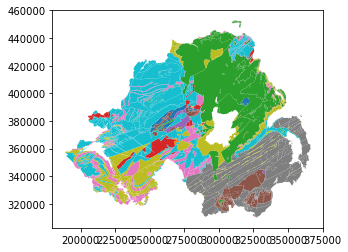

In [29]:
bedrocks.plot('UnitName')

C:\Users\asuwa\anaconda3\envs\RadonNI\lib\site-packages\geopandas\plotting.py:634: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  warnings.warn(


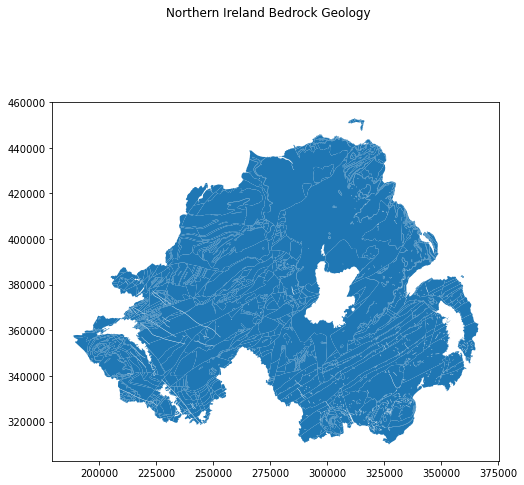

In [28]:
f, ax = plt.subplots(1, figsize=(8, 8))
ax = bedrocks.plot(axes=ax)
f.suptitle('Northern Ireland Bedrock Geology')
plt.show('UnitName')

In [6]:
bedrocks

,MSLINK_0,UnitName,Code,area,geometry
0,3678,ACID VOLCANICS,5,4.171498e+05,"POLYGON ((306027.195 353143.694, 306147.747 35..."
1,3678,ACID VOLCANICS,5,8.885223e+05,"POLYGON ((305968.411 353228.661, 306164.238 35..."
2,3659,ACID VOLCANICS,5,5.596615e+04,"POLYGON ((313527.461 407868.052, 313589.811 40..."
3,3663,ACID VOLCANICS,5,9.072705e+04,"POLYGON ((325888.569 386805.060, 325974.534 38..."
4,3659,ACID VOLCANICS,5,1.247527e+05,"POLYGON ((311478.844 406950.057, 311603.542 40..."
...,...,...,...,...,...
2258,3602,SANDSTONE,8,1.299333e+08,"POLYGON ((275379.821 345384.076, 275448.622 34..."
2259,3689,SANDSTONE,8,2.949386e+05,"POLYGON ((344783.212 372882.594, 344956.610 37..."
2260,3581,SANDSTONE,8,3.032128e+05,"POLYGON ((310257.133 438486.495, 310370.824 43..."
2261,0,SANDSTONE,8,1.311301e+01,"POLYGON ((262865.226 428766.507, 262868.173 42..."


In [7]:
bedrocks.head

<bound method NDFrame.head of       MSLINK_0        UnitName  Code          area  \
0         3678  ACID VOLCANICS     5  4.171498e+05   
1         3678  ACID VOLCANICS     5  8.885223e+05   
2         3659  ACID VOLCANICS     5  5.596615e+04   
3         3663  ACID VOLCANICS     5  9.072705e+04   
4         3659  ACID VOLCANICS     5  1.247527e+05   
...        ...             ...   ...           ...   
2258      3602       SANDSTONE     8  1.299333e+08   
2259      3689       SANDSTONE     8  2.949386e+05   
2260      3581       SANDSTONE     8  3.032128e+05   
2261         0       SANDSTONE     8  1.311301e+01   
2262         0       SANDSTONE     8  2.384296e+01   

                                               geometry  
0     POLYGON ((306027.195 353143.694, 306147.747 35...  
1     POLYGON ((305968.411 353228.661, 306164.238 35...  
2     POLYGON ((313527.461 407868.052, 313589.811 40...  
3     POLYGON ((325888.569 386805.060, 325974.534 38...  
4     POLYGON ((311478.844 4069

In [8]:
bedrocks.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [9]:
bedrocks.columns

Index(['MSLINK_0', 'UnitName', 'Code', 'area', 'geometry'], dtype='object')

In [10]:
rocks = bedrocks['UnitName'].tolist() # Get a list of a particular column (DERMOT)
print(rocks)

['ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ACID VOLCANICS', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'ANDESITE', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', 'BASALT', '

In [11]:
bedrocks['UnitName'].value_counts()

LIMESTONE                 492
MUDSTONE                  490
SANDSTONE                 346
BASALT                    343
GRANITE                   184
LITHIC ARENITE            174
PSAMMITE & Semi-Pelite    139
CONGLOMERATE               41
ACID VOLCANICS             24
ANDESITE                   18
GABBRO                     12
Name: UnitName, dtype: int64

In [12]:
bedrocks['UnitName'].value_counts(normalize=True)

LIMESTONE                 0.217411
MUDSTONE                  0.216527
SANDSTONE                 0.152894
BASALT                    0.151569
GRANITE                   0.081308
LITHIC ARENITE            0.076889
PSAMMITE & Semi-Pelite    0.061423
CONGLOMERATE              0.018118
ACID VOLCANICS            0.010605
ANDESITE                  0.007954
GABBRO                    0.005303
Name: UnitName, dtype: float64

In [13]:
bedrocks['UnitName'].describe()

count          2263
unique           11
top       LIMESTONE
freq            492
Name: UnitName, dtype: object

In [14]:
# load the radon data of Northern Ireland
radon = gpd.read_file('data_files/RadonNI.shp')

In [15]:
radon.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

In [16]:
radon_bedrock = gpd.sjoin(bedrocks, radon, how='inner', lsuffix='left', rsuffix='right') 

In [17]:
radon_bedrock

,MSLINK_0,UnitName,Code,area,geometry,index_right,Tile,class,x,y
1,3678,ACID VOLCANICS,5,8.885223e+05,"POLYGON ((305968.411 353228.661, 306164.238 35...",10134,J0653,4,306500,353500
1,3678,ACID VOLCANICS,5,8.885223e+05,"POLYGON ((305968.411 353228.661, 306164.238 35...",10307,J0652,1,306500,352500
3,3663,ACID VOLCANICS,5,9.072705e+04,"POLYGON ((325888.569 386805.060, 325974.534 38...",5275,J2586,1,325500,386500
4,3659,ACID VOLCANICS,5,1.247527e+05,"POLYGON ((311478.844 406950.057, 311603.542 40...",2897,D1106,1,311500,406500
9,3659,ACID VOLCANICS,5,9.223958e+05,"POLYGON ((319385.996 357532.585, 319634.394 35...",9453,J1957,1,319500,357500
...,...,...,...,...,...,...,...,...,...,...
2258,3602,SANDSTONE,8,1.299333e+08,"POLYGON ((275379.821 345384.076, 275448.622 34...",9413,H7957,2,279500,357500
2258,3602,SANDSTONE,8,1.299333e+08,"POLYGON ((275379.821 345384.076, 275448.622 34...",9241,H8058,2,280500,358500
2258,3602,SANDSTONE,8,1.299333e+08,"POLYGON ((275379.821 345384.076, 275448.622 34...",8908,H8160,2,281500,360500
2258,3602,SANDSTONE,8,1.299333e+08,"POLYGON ((275379.821 345384.076, 275448.622 34...",8907,H8060,2,280500,360500


In [18]:
radon_bedrock.to_file('data_files/radon_bedrock.shp')

<ipython-input-18-0a419f41f3bd>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  radon_bedrock.to_file('data_files/radon_bedrock.shp')


In [19]:
radon_bedrock = gpd.read_file('data_files/radon_bedrock.shp') # load the radon-counties shapefile

In [20]:
radon_bedrock

,MSLINK_0,UnitName,Code,area,index_righ,Tile,class,x,y,geometry
0,3678,ACID VOLCANICS,5,8.885223e+05,10134,J0653,4,306500,353500,"POLYGON ((305968.411 353228.661, 306164.238 35..."
1,3678,ACID VOLCANICS,5,8.885223e+05,10307,J0652,1,306500,352500,"POLYGON ((305968.411 353228.661, 306164.238 35..."
2,3663,ACID VOLCANICS,5,9.072705e+04,5275,J2586,1,325500,386500,"POLYGON ((325888.569 386805.060, 325974.534 38..."
3,3659,ACID VOLCANICS,5,1.247527e+05,2897,D1106,1,311500,406500,"POLYGON ((311478.844 406950.057, 311603.542 40..."
4,3659,ACID VOLCANICS,5,9.223958e+05,9453,J1957,1,319500,357500,"POLYGON ((319385.996 357532.585, 319634.394 35..."
...,...,...,...,...,...,...,...,...,...,...
13458,3602,SANDSTONE,8,1.299333e+08,9413,H7957,2,279500,357500,"POLYGON ((275379.821 345384.076, 275448.622 34..."
13459,3602,SANDSTONE,8,1.299333e+08,9241,H8058,2,280500,358500,"POLYGON ((275379.821 345384.076, 275448.622 34..."
13460,3602,SANDSTONE,8,1.299333e+08,8908,H8160,2,281500,360500,"POLYGON ((275379.821 345384.076, 275448.622 34..."
13461,3602,SANDSTONE,8,1.299333e+08,8907,H8060,2,280500,360500,"POLYGON ((275379.821 345384.076, 275448.622 34..."


In [21]:
radon_bedrock.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

<AxesSubplot:>

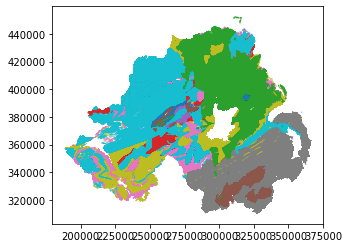

In [22]:
%matplotlib inline

radon_bedrock.plot('UnitName')

<AxesSubplot:>

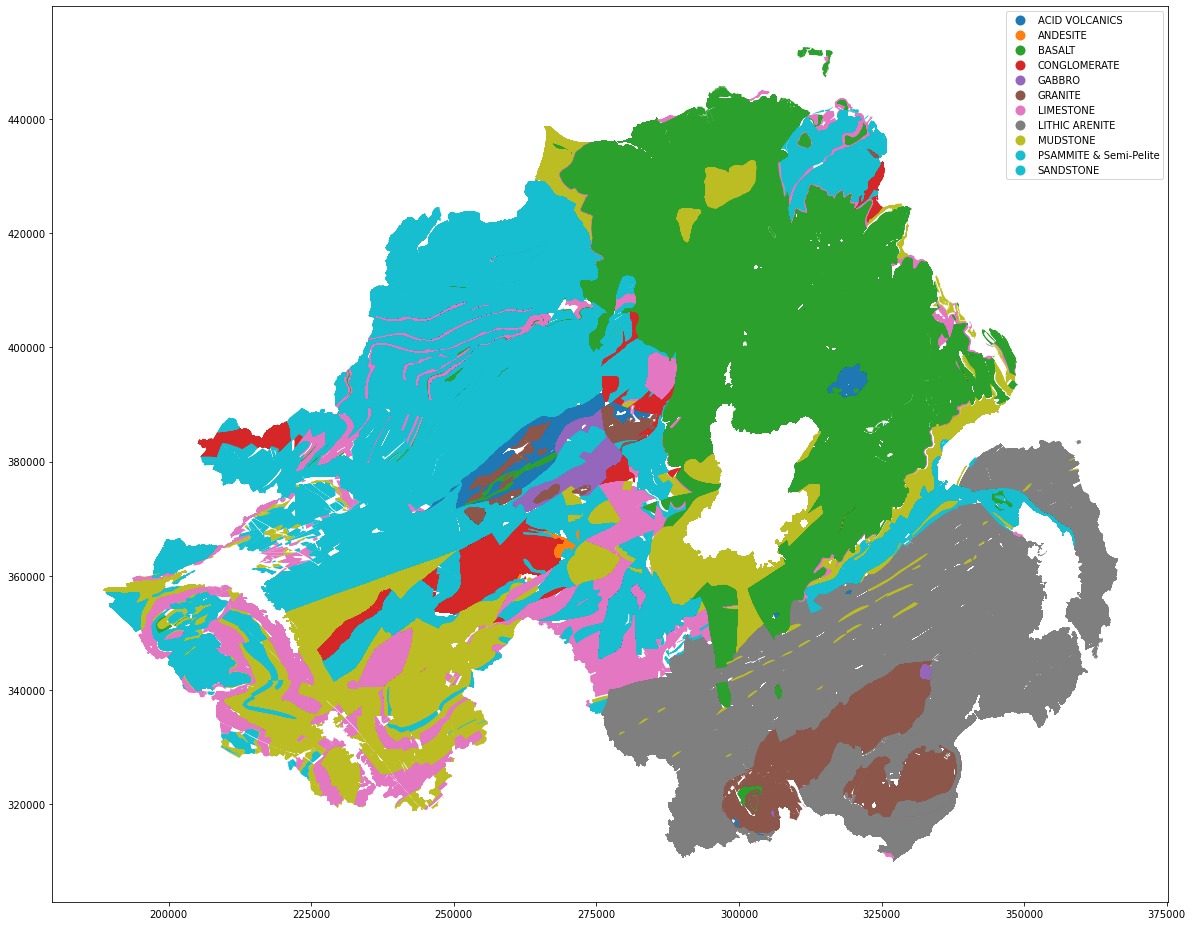

In [23]:
radon_bedrock.plot(column='UnitName', cmap=None, legend=True, figsize=(20, 20))

In [24]:
print(radon_bedrock.groupby(['UnitName', 'class'])['class'].count()) # summarize the radon distribution by CountyName

UnitName        class
ACID VOLCANICS  1          4
                2          4
                3          2
                4         33
                5        114
                        ... 
SANDSTONE       2        554
                3        232
                4        546
                5        138
                6          8
Name: class, Length: 64, dtype: int64


In [25]:
radon_mean = radon_bedrock.groupby(['UnitName'])['class'].mean() # summarize the radon distribution by CountyName

<AxesSubplot:>

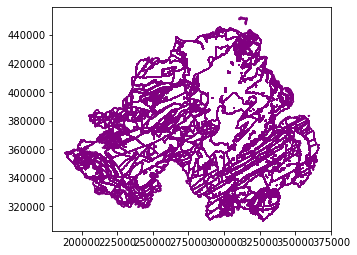

In [26]:
radon_bedrock.plot(figsize=(5,5), edgecolor="purple", facecolor="None")

In [27]:
columns_to_divide = ['open', 'close']
df[columns_to_divide] = df[columns_to_divide] / df['prev']

NameError: name 'df' is not defined